# The Jumping Frog Problem

Suppose we have a finite number $n$ of cells, uniformally distributed along a horizontal line and numbered from left to right starting from $0$, and a frog whose leaps can take it from one cell to any adjacent cell. Additionally, suppose that, whenever the frog reaches a cell located at an extreme, its jumps change to the opposite direction.

Let $s$ be the number of the cell the frog is initially in and $j$ be the number of jumps that the frog will execute, where we adopt the convention that positive numbers mean that the frog will start jumping to the right, whereas negative numbers indicate that it will being jumping to the left.

The problem is to **determine the final cell the frog will land on as a function of $n$, $s$ and $j$**. In the following, we will denote this function as $f(n,s,j)$.

I will now proceed to explain how I went about finding said function.

**Note** If this problem has peaked your attention, however minimally, I strongly suggest you attempt to solve it on your own _before_ reading my solution, since you may come up with a different approach!

## Experimentation

To gain some intuition regarding this problem, the first thing I did was try to "tabulate" some "final cell values" with the help of a visual aid (i.e. a drawing).

Since the solution we are looking for is a function of three variables, I decided to first fix the number of cells as $n=3$ and write down a table with all posible values of $s$ (that is, from $0$ to $n-1$) as columns and values from $-n-1$ to $n+1$ as rows:

|j\s|0|1|2|
|-|-|-|-|
|-4|0|1|2|
|-3|1|2|1|
|-2|2|1|0|
|-1|1|0|1|
|0|0|1|2|
|1|1|2|1|
|2|2|1|0|
|3|1|0|1|
|4|0|1|2|

Even though some patterns have started to emerge from the previous table, since the case for $n=3$ (and, more generally, any odd number $n$) has a spatial symmetry around a "central" cell, I wanted to make sure these same patterns would emerge in the case of even $n$. Therefore, I wrote down an analogous table for the $n=4$ case, which I will not include here (since it can quickly be calculated by whoever would like to see it).

## Observations

The crucial observations I made for both of the previous tables (in the same order in which I noticed them) are the following:

**Observation 1** _The "final cell values" are shifted upwards when the value of $s$ increases_. In other words -for those familiar with Group Theory-, they both look like Cayley tables whose columns are shifted.

This already starts simplyfing our problem since it implies that, for any fixed values of $n$ and $j$, it is sufficient to calculate the "final cell values" for **any** value $s$, and use these to calculate the "final cell values" corresponding to other values of $s$. More precisely, we can write this down as the mathematical equation

$$f(n,s,j) = f(n,0,j+s). \quad (1)$$

**Observation 2** For any fixed values of $n$ and $s$, _the "final cell values" are periodic in the variable $j$_; specifically, with period $2(n-1)$.

This tells us that, for any fixed values of $n$ and $s$, we can simplify our problem by calculating the "finall cell values" in _one period_ (e.g. $[0,2(n-1)]\subset\mathbb{N}$) and extending it _periodically_ over the integers.

**Observation 3** For any fixed value of $n$, _the "final cell values" corresponding to the column $s=0$ are symmetric with respect to the row $j=0$._

This makes sense since, intuitively, it is telling us that whenever the frog starts from the cell on the _left_ extreme, it is irrelevant whether it begins jumping to the left or to the right. Similarly, for any fixed $n$, the "final cell values" corresponding to the column $s=n-1$ are symmetric with respect to the row $j=0$ since, in this case, the frog starts from the cell on the _right_ extreme. However, the dependence on the value of $n$ in this case makes it slightly more complicated and, therefore, less useful than **Observation 3**.

In light of **Observations 1** and **3**, I then decided to fix the value of $s=0$ and write down a table of "final cell values" with $n$ column values $3,4,5$ and $6$, and $j$ row values ranging from $1$ to $10$ -which, following **Observation 2**, is equal to the period $2(n-1)$ of the largest chosen value of $n=6$-, resulting in the following:

|j\n|3|4|5|6|
|-|-|-|-|-|
|1|1|1|1|1|
|2|2|2|2|2|
|3|1|3|3|3|
|4|0|2|4|4|
|5|1|1|3|5|
|6|2|0|2|4|
|7|1|1|1|3|
|8|0|2|0|2|
|9|1|3|1|1|
|10|2|2|2|0|

which basically confirms **Observation 2** for more values of $n$ than previously seen.

## Further analysis and construction of a solution

It is obvious that, for any $n$, $s=0$ and $j=0$ have $0$ as thier "final cell value", since the frog doesn't jump from its starting place, cell $0$. Therefore, we may obtain the following graph from the $n=3$ column of the previous table:

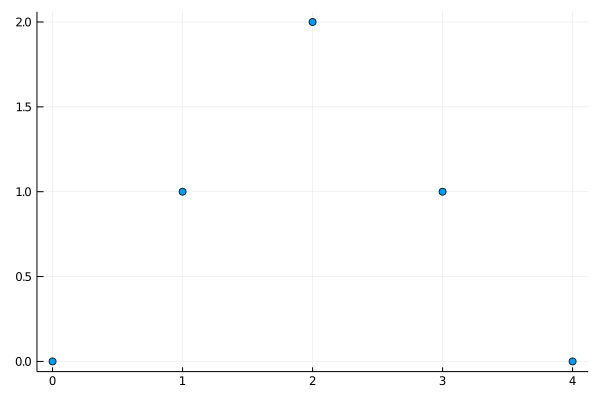

In [4]:
using Plots

scatter(0:4,[0,1,2,1,0], legend=false)

Similarly, graphing the other columns -corresponding to other values of $n$- would result in a similar "peak" at $n-1$. Notice that, for any fixed $n$, this discrete "peak" graph is equal to the identity for values from $0$ to $n-1$. However, for values in the domain greater than $n-1$, their image is equal to $n-1$ _minus_ the distance from said value to $n-1$. More precisely, this can be written down as a function of two variables as follows:

$$\begin{align*}&p:\mathbb{N}\times\mathbb{N}\to\mathbb{N}, \\ \\ p(n,x) := &\begin{cases} x &\text{if } x\leq n-1, \\ n-1-|n-1-x| &\text{if } x\geq n-1, \end{cases} \end{align*}$$

where $p$ stands for "peak". Notice that $p$ is well defined at $x=n-1$. Moreover, it can be implemented in a single line of Julia code using the ternary operator `?`:

In [6]:
p(n,x) = x < (n-1) ? x : n-1 - abs(n-1-x)

p (generic function with 1 method)

Before proceeding, let us verify that the graph of $p(n,x)$ with $x$ in the domain $[0,2(n-1)]\subset\mathbb{N}$ for different values of $n$ is the same as the column corresponding to said value of $n$ in the previous table:

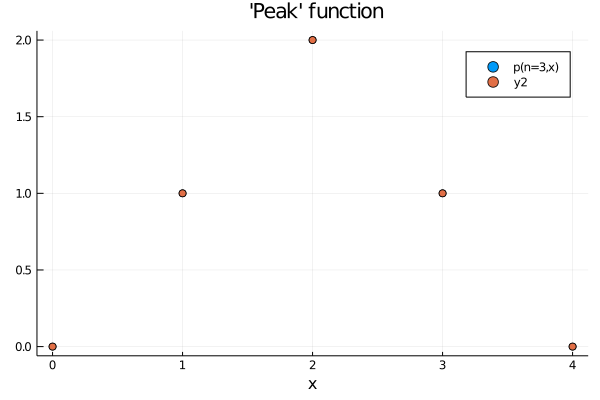

In [7]:
n = 3 # Define n value

X = 0:2*(n-1) # Define x's domain from 0 to 2(n-1)

scatter(X,p.(n,X), label = "p(n=$n,x)", xlabel = "x", title = " 'Peak' function")

### Periodical extension to the natural numbers

For any fixed $n$, our function $p(n,x)$ only works in the desired manner in the domain $[0,2(n-1)]\subset\mathbb{N}$ for the variable $x$. We must therefore find a way to extend it periodically to all the integers; first, we will periodically extend it to the natural numbers. For $x > 2(n-1)$, it suffices to take the residue of the integer division of $x$ divided by $2(n-1)$, which is written in Julia as

``x % (2*(n-1))``.

Therefore, the provisional function

In [4]:
p2(n,x) = p(n, x % (2*(n-1)))

p2 (generic function with 1 method)

extends the function $p$ to all the naturals, as is shown by the following graph:

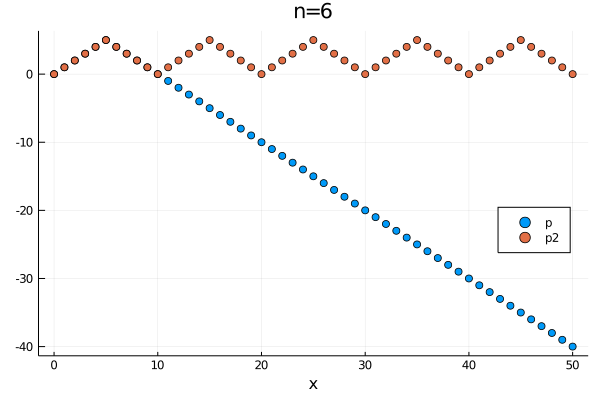

In [5]:
n = 6 # Define n value

X = 0:10*(n-1) # Define x's domain from 0 to 10(n-1)

scatter(X,p.(n,X), label = "p", xlabel = "x", title = "n=$n", legend = :right)
scatter!(X,p2.(n,X), label = "p2")

### Extension to the integers

For any fixed $n$, $p2(n,x)$ works in the desired manner in the domain $\mathbb{N}$ for $x$, but we want to extend it to $\mathbb{Z}$ -since we want to be able to account for the frog jumping initially in both directions. Due to **Observation 3**, we know that, for any fixed $n$, setting $s=0$ in our solution must render a function that is symmetric with respect to the origin $j=0$ (i.e. an even function). Therefore, it suffices to replace the second argument of $p2$ with its absolute value:

In [6]:
p3(n,x) = p2(n,abs(x))

p3 (generic function with 1 method)

This extends the function $p2$ to the integers, as is shown by the following graph:

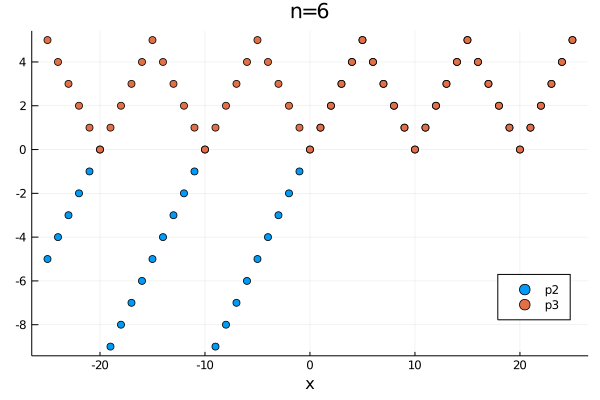

In [7]:
n = 6 # Define n value

X = -5*(n-1):5*(n-1) # Define x's domain from -5(n-1) to 5(n-1)

scatter(X,p2.(n,X), label = "p2", xlabel = "x", title = "n=$n", legend = :bottomright)
scatter!(X,p3.(n,X), label = "p3")

Finally, since we have constructed $p3$ deliberately such that

$$p3(n,x) = f(n,0,x),$$

we deduce from equation (1) that our solution to the jumping frog problem is

$$f(n,s,j) := p3(n,j+s).$$

That is,

In [8]:
f(n,s,j) = p3(n,j+s)

f (generic function with 1 method)

### Explicit solution

Following our definitions, we can calculate $f$ explicitly as

$$\begin{align*} f(n,s,j) &= \text{p3}(n,j+s) \\ \\ &= \text{p2}(n,|j+s|) \\ \\ &= \text{p}(n,|(j+s) \text{ mod } 2(n-1)|) \\ \\ &= \begin{cases} |(j+s) \text{ mod } 2(n-1)| &\text{if } |(j+s) \text{ mod } 2(n-1)| < n-1, \\ n-1 - \big|n-1- |(j+s) \text{ mod } 2(n-1)| \big| &\text{if } |(j+s) \text{ mod } 2(n-1)|\geq n-1. \end{cases} \end{align*}$$

Since by now we have already defined a function named `f` in Julia, we will implement the previous formula in a single line as a function named `explicitSolution`:

In [9]:
explicitSolution(n,s,j) = abs( (j+s) % (2*(n-1)) ) < n-1 ? abs( (j+s) % (2*(n-1)) ) : n-1 - abs( n-1 - abs( (j+s) % (2*(n-1)) ) ) 

explicitSolution (generic function with 1 method)

_Try it out!_

**Note** I'm certain there must be a more elegant solution to this problem. However, I hope that you found this exposition of my particular problem-solving process illuminating in some way and, hopefully, gained something from it.

### Afterthought

Noticing that

$$\begin{align*} x\leq n-1 &\implies n-1-x \geq 0 \\ &\implies |n-1-x| = n-1-x \\ &\implies n-1-|n-1-x| = x, \end{align*}$$

we can give an equivalent definition for $p:\mathbb{N}\times\mathbb{N}\to\mathbb{N}$ which is non-conditional:

$$p(n,x) := n-1-|n-1-x|.$$

This can be easily implemented as

In [8]:
p(n,x) = n-1-abs(n-1-x)

p (generic function with 1 method)

and _this_ function `p` can then be used to define `p2`, `p3` and `f`, executing the corresponding cells. Using this simple expression for $p$, we can arrive at a simpler expression for our explicit solution $f$:

$$\begin{align*} f(n,s,j) &= \dots \\ &= \text{p}(n,|(j+s) \text{ mod } 2(n-1)|) \\ &= n-1 - \big|n-1- |(j+s) \text{ mod } 2(n-1)| \big|. \end{align*}$$

We implement this simplified solution as follows:

In [ ]:
simplifiedSolution(n,s,j) = n-1 - abs( n-1 - abs( (j+s) % (2*(n-1)) ) )